### Задачи
- Получить изображение, на котором присутствуют искажения пространства, например, квадрат превращается в трапецию при фотографии с определенного угла.

- Провести проективное преобразование более сложного объекта, чем квадрат. В результате обработки изображения получить неискаженное изображение объекта.


### Сфера

- Данная задача относится к оптике. Происходит преобразование трёхмерного объекта в двухмерную проекцию и наоборот

### Гомография

- Гомография — перспективное преобразование плоскости.

- Гомография — это преобразование, которое отображает точки одного изображения в точки соответствия другого изображения.

- Гомография - частный случай модели фундаментальных проективных преобразований, когда объекты сцены находятся в плоскостях (z = 0).

Учитывая эту особенность, из матриц фундаментальных проективных преобразований получаем матрицу гомографии.




\begin{equation*}
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
r_{00} & r_{01} & r_{02} & t_x \\
r_{10} & r_{11} & r_{12} & t_y \\
r_{20} & r_{21} & r_{22} & t_z \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z \\
1 \\
\end{bmatrix}
\end{equation*}


\begin{equation*}
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
r_{00} & r_{01} & t_x \\
r_{10} & r_{11} & t_y \\
r_{20} & r_{21} & t_z \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
f_x r_{00} + c_x r_{20} & f_x r_{01} + c_x r_{21} & f_x t_{03} + c_x t_{23} \\
f_y r_{10} + c_y r_{20} & f_y r_{11} + c_y r_{21} & f_y t_{13} + c_y t_{23} \\
r_{20} & r_{21} & t_{23} \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
h_{00} & h_{01} & h_{02} \\
h_{10} & h_{11} & h_{12} \\
h_{20} & h_{21} & h_{22} \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
\end{equation*}

Получаем уравнения относительно $u$ и $v$:

\begin{equation*}
u = {{h_{00} x + h_{01} y + h_{02}}\over{h_{20} x + h_{21} y + h_{22}}}
\end{equation*}

\begin{equation*}
v = {{h_{10} x + h_{11} y + h_{12}}\over{h_{20} x + h_{21} y + h_{22}}}
\end{equation*}

Результат не изменится, если числитель и знаменатель в обоих уравнениях разделим на $h_{22}$ ($t_{23}$).

Тогда в уравнениях $h_{22} = 1$, а остальные параметры нормализуются по отношению к $h_{22}$.

После этого из $9$ параметров матрицы гомографии остаются только $8$ параметров.

\begin{equation*}
\begin{bmatrix}
h_{00} & h_{01} & h_{02} \\
h_{10} & h_{11} & h_{12} \\
h_{20} & h_{21} & 1 \\
\end{bmatrix}
\end{equation*}

Для их определения достаточно  задать $4$ соответствующие точки в плоскостях и решить систему из $8$ уравнений. 

In [73]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

img_points = []
upd_img_points = []

def img_pick(event, x, y, flags, params):
    global img_points
    if event == cv2.EVENT_LBUTTONDOWN:
        img_points.clear() if len(img_points) >= 4 else img_points.append((x, y))


def upd_img_pick(event, x, y, flags, params):
    global upd_img_points
    if event == cv2.EVENT_LBUTTONDOWN:
        upd_img_points.clear() if len(upd_img_points) >= 4 else upd_img_points.append((x, y))


def print_points(points_lst, picture):
    radius, color, thickness = 3, (0, 0, 255), -1
    for point in points_lst:
        cv2.circle(picture, point, radius, color, thickness)


def show_results(*args):
    plt.rcParams["figure.figsize"] = [10.00, 5.00]
    plt.rcParams["figure.autolayout"] = True
    for i in range(len(args)):
        arg = cv2.cvtColor(args[i], cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(args), i + 1)
        plt.axis('off')
        plt.imshow(arg)
    plt.show()

In [89]:
def run(input_img):
    output_img = input_img.replace(os.path.basename(input_img), '_out.'.join(os.path.basename(input_img).split('.')))

    cv2.namedWindow(input_img)
    cv2.setMouseCallback(input_img, img_pick)
    cv2.namedWindow(output_img)
    cv2.setMouseCallback(output_img, upd_img_pick)

    img = cv2.imread(input_img)
    upd_img = np.zeros(img.shape, dtype=np.uint8)
    last_upd_img = upd_img.copy()

    while True:
        img_copy = img.copy()
        upd_img_copy = upd_img.copy()
        print_points(img_points, img_copy)
        print_points(upd_img_points, upd_img_copy)

        if len(img_points) == len(upd_img_points) == 4:
            homography = cv2.findHomography(np.array(img_points), np.array(upd_img_points))
            upd_img_copy = cv2.warpPerspective(img_copy, homography[0], (upd_img_copy.shape[1], upd_img_copy.shape[0]))
            last_upd_img = upd_img_copy

        cv2.imshow(input_img, img_copy)
        cv2.imshow(output_img, upd_img_copy)

        if cv2.waitKey(1) == 27:  
            show_results(*[img, last_upd_img])
            cv2.destroyAllWindows()
            img_points.clear()
            upd_img_points.clear()
            break
            

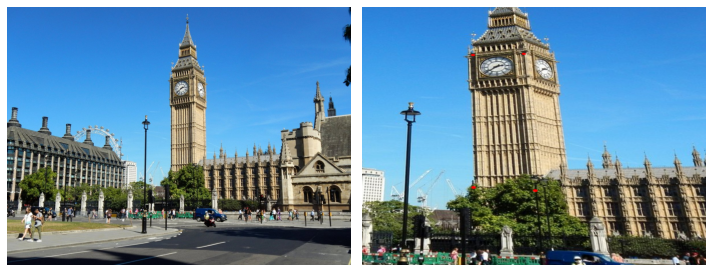

In [92]:
run('./data/building.png')

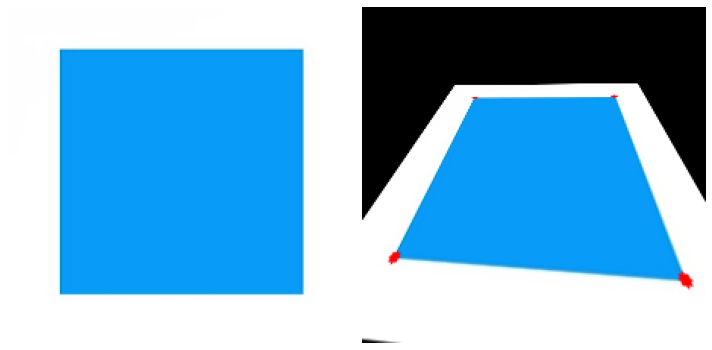

In [94]:
run('./data/square.png')